In [1]:
import numpy as np
from skimage import io
from matplotlib import pyplot as plt

In [2]:
import warnings
warnings.filterwarnings('ignore')

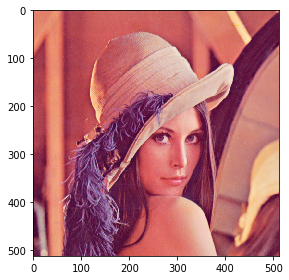

In [3]:
image = io.imread('Lena.tiff')
io.imshow(image)

Text Encryption

In [4]:
rows, columns, dimensions = image.shape
f = open('Text.txt', 'r')
message = f.read()
message

'Exploring Image Binarization Techniques - The book focuses on an image processing technique known as binarization. It provides a comprehensive survey over existing binarization techniques for both document and graphic images. A number of evaluation techniques have been presented for quantitative comparison of different binarization methods. The book provides results obtained comparing a number of standard and widely used binarization algorithms using some standard evaluation metrics. The comparative results presented in tables and charts facilitates understanding the process. In addition to this, the book presents techniques for preparing a reference image which is very much important for quantitative evaluation of the binarization techniques. The results are produced taking image samples from standard image databases.'

In [5]:
total_bits = rows*columns*dimensions
one_channel_bits = rows*columns
one_channel_bits, total_bits

(262144, 786432)

In [6]:
# message = message + ' - by giridhar!'
# # change the message  - to test

In [7]:
def to_bits(s):
    result = []
    for c in s:
        bits = bin(ord(c))[2:]
        bits= '00000000'[len(bits):]+bits
        result.extend(int(b) for b in bits)
    return result

In [8]:
message_bits = to_bits(message)
print(message_bits)

[0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 

In [9]:
message_len = len(message_bits)
message_len

6640

In [10]:
l = to_bits(str(message_len))
print(l)

[0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0]


In [11]:
l_len = len(l)
l_len

32

In [12]:
im_lsb = np.zeros(image.shape)
for i in range(0,512):
    for j in range(0,512):
        im_lsb[i][j] = image[i,j,0] & 1

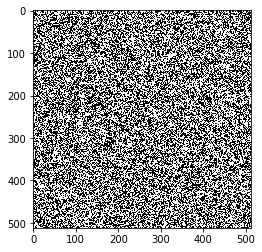

In [13]:
plt.imshow((im_lsb), cmap='gray')

In [14]:
# (12 &~1) | 1

In [15]:
## message length - in the beginning of first row
# new_image = np.copy(image)
# i = 0
# j = 0
# channel = 0
# for bit in l:
#     new_image[i, j, channel] = (new_image[i, j, channel] & ~1) | bit
#     j += 1
# io.imsave('Text_encoded_lena.tiff', new_image)

In [16]:
new_image = np.copy(image)
i = 0
lim = image.shape[1] - l_len -1
j = lim
# j = 512 - 1 - 32
# j = image.shape[1] - 1
channel = 0
for bit in l:
    new_image[i, j, channel] = (new_image[i, j, channel] & ~1) | bit
    j += 1
j = 0
while(j < lim):
    new_image[i, j, channel] = (new_image[i, j, channel] & 0)
    j += 1
io.imsave('Text_encoded_lena.tiff', new_image)

In [21]:
i = 1
j = 0
channel = 0
for bit in message_bits:
    new_image[i, j, channel] = (new_image[i, j, channel] & ~1) | bit
    j += 1
    if j == columns:
        j = 0
        i += 1
    if i == rows:
        break
io.imsave('Text_encoded_lena.tiff', new_image)

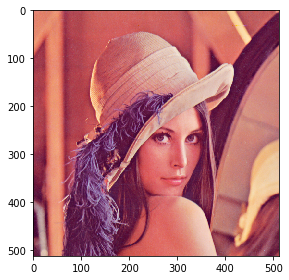

In [22]:
io.imshow('Text_encoded_lena.tiff')

In [23]:
nim_lsb = np.zeros(new_image.shape)
for i in range(0,512):
    for j in range(0,512):
        nim_lsb[i][j] = new_image[i,j,0] & 1

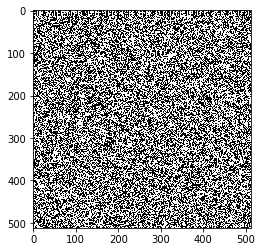

In [24]:
plt.imshow((nim_lsb), cmap='gray')

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


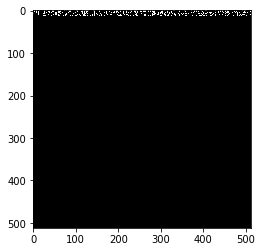

In [25]:
plt.imshow((im_lsb-nim_lsb), cmap='gray')

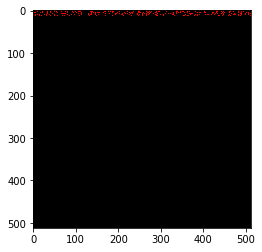

In [26]:
plt.imshow((image-new_image), cmap='gray')